<a href="https://colab.research.google.com/github/ksimhadr/learn/blob/master/241562554_EE950_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Introduction
  
  Visualizing Datasets - Assignment 2 - Karthik Simhadri (241562554)

  DataSet_1:
  - Downloaded dataset from Kaggle Olympic Historical Dataset: https://www.kaggle.com/datasets/muhammadehsan000/olympic-historical-dataset-1896-2020
  
  - Visualyzing Olympics Country wise results from 1908 to 2022  
  
  DataSet_2:
  - Iris DataSet
  


1.2. Preparation
  - Importing necessary libraries for Data Visualization

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import plotly.express as px

1.3. Loading the dataset 1
# - preparing data for last 5 years

In [30]:
data = pd.read_csv('/content/sample_data/Olympic_Games_Medal_Tally.csv')
#print(data)
if 'year' in data.columns:
    # Convert the 'year' column to integer type (if it's not already)
    data['year'] = data['year'].astype(int)

    # Get the last 5 Olympic Games years
    last_5_years = data['year'].unique()
    last_5_years = sorted(last_5_years)[-5:]

    # Filter the dataset for the last 5 Olympic Games years
    data_last_5_years = data[data['year'].isin(last_5_years)]

    # Display the filtered dataset
    data_last_5_years.head()

1.4. Total number of medals won by top 10 countries

<Figure size 1200x800 with 0 Axes>

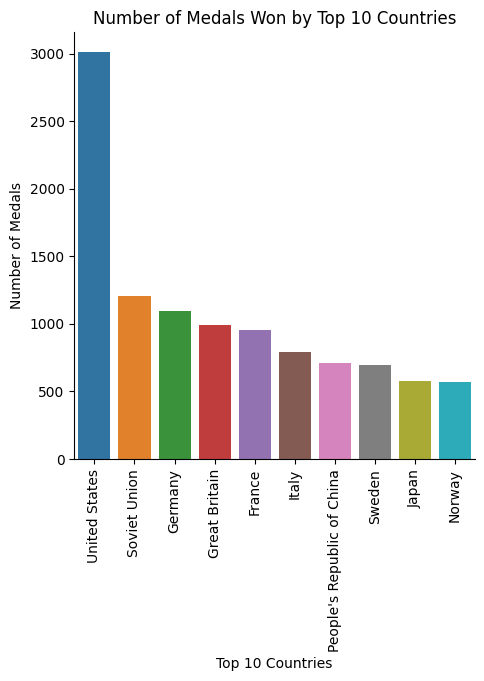

In [77]:
# Cat plot for total medals by top 10 countries
data_total_medals = data.groupby('country')[['total']].sum().sort_values(by='total', ascending=False)
plt.figure(figsize=(12, 8))
sns.catplot(x='country', y='total', data=data_total_medals.head(10), kind = 'bar', hue='country')
plt.title('Number of Medals Won by Top 10 Countries')
plt.xlabel('Top 10 Countries')
plt.ylabel('Number of Medals')
plt.xticks(rotation=90)
plt.show()

1.5. Medal Distribution by country from last 5 years data

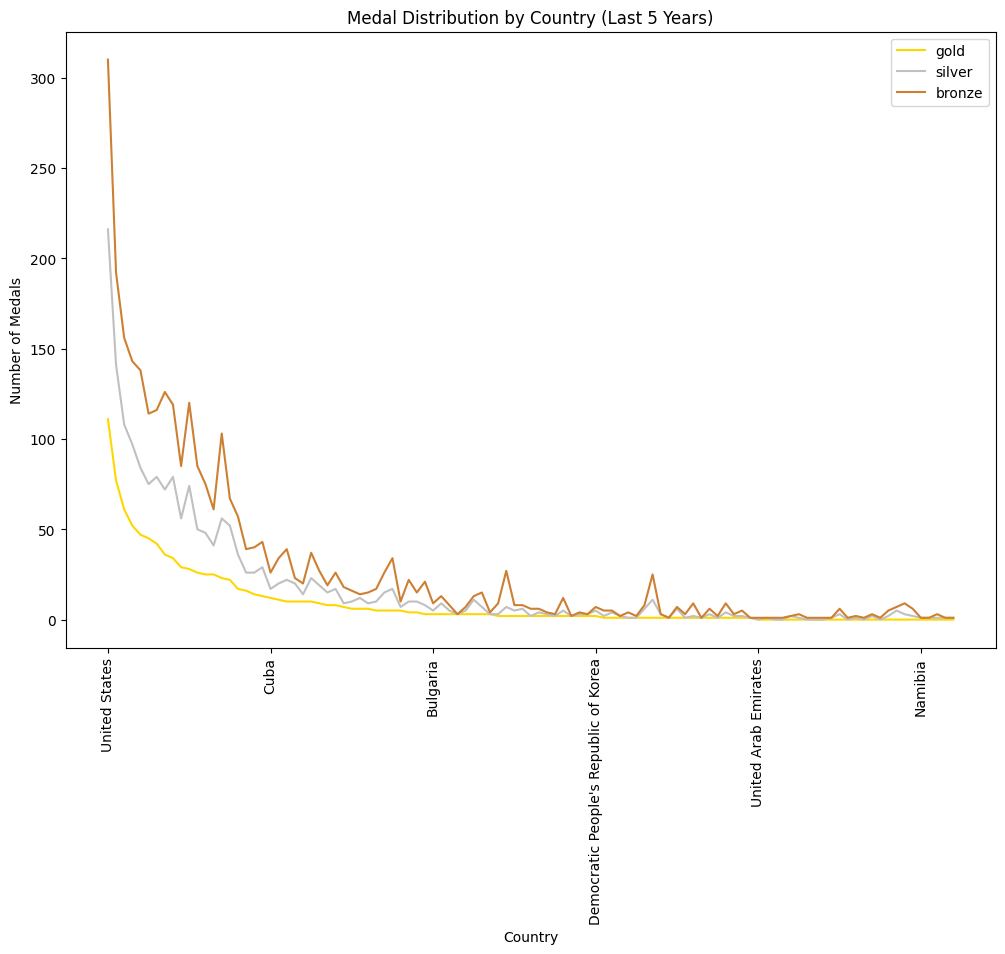

In [51]:
#sorting the data based on medals for last 5 years
data_last_5_years_sorted = data_last_5_years.groupby('country')[['gold', 'silver', 'bronze']].sum().sort_values(by='gold', ascending=False)

data_last_5_years_sorted.plot(kind='line', stacked=True, color=['gold', 'silver', '#cd7f32'], figsize=(12, 8))
plt.title('Medal Distribution by Country (Last 5 Years)')
plt.xlabel('Country')
plt.ylabel('Number of Medals')
plt.xticks(rotation=90)
plt.show()

1.6.Pie chart of medals won by a specific country

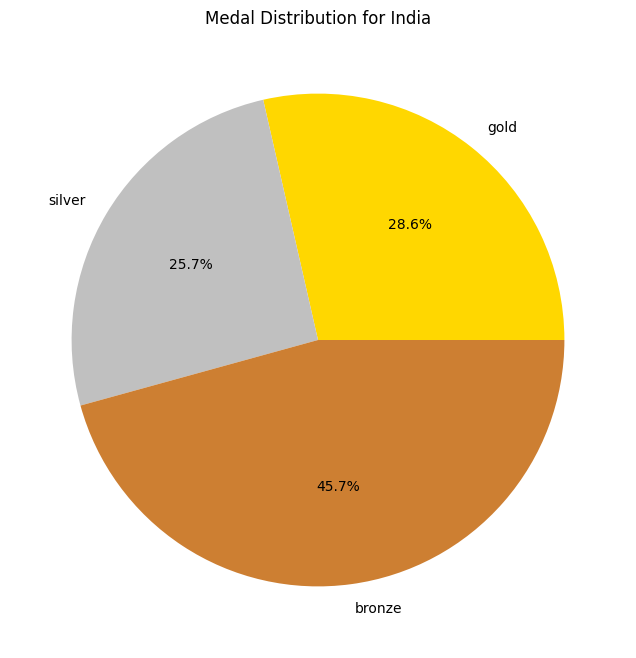

In [39]:
# Pie chart for a specific country
Country = 'India'
country_data = data[data['country'] == Country][['gold', 'silver', 'bronze']].sum()

plt.figure(figsize=(8, 8))
plt.pie(country_data, labels=country_data.index, autopct='%1.1f%%', colors=['gold', 'silver', '#cd7f32'])
plt.title(f'Medal Distribution for {country}')
plt.show()

2.1. DataSet 2: Iris

2.2. Importing required libraries

In [78]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import plotly.express as px

2.3. A pairplot to visualize the relationships between different features, colored by species.

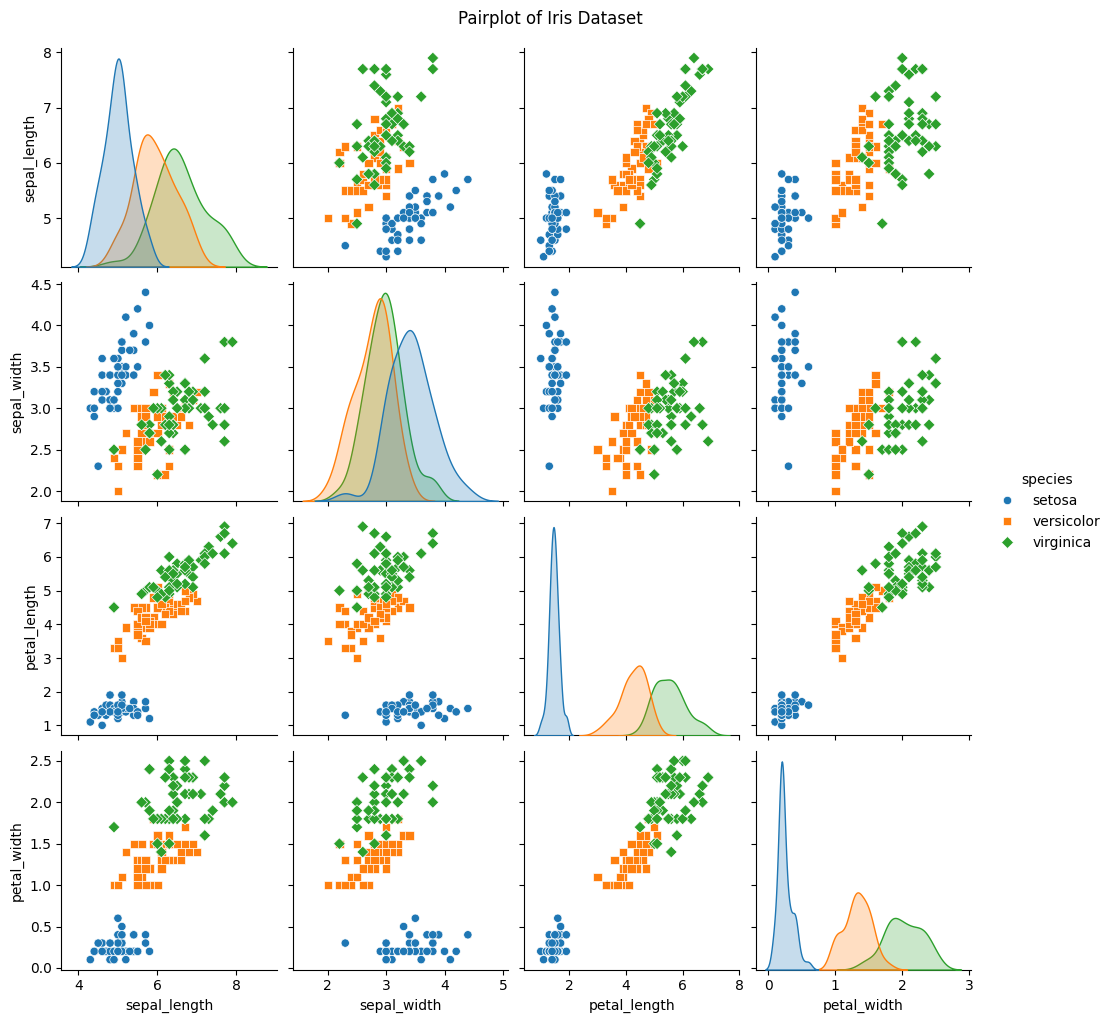

In [82]:
# Pairplot for the Iris dataset
iris_data=sns.load_dataset('iris')
sns.pairplot(iris_data, hue='species', markers=["o", "s", "D"])
#Add a centered suptitle to the figure.
plt.suptitle('Pairplot of Iris Dataset', y=1.02)
plt.show()

2.4. 3D Scatter Plot

A 3D scatter plot to visualize the relationship between three features: sepal length, sepal width, and petal length.

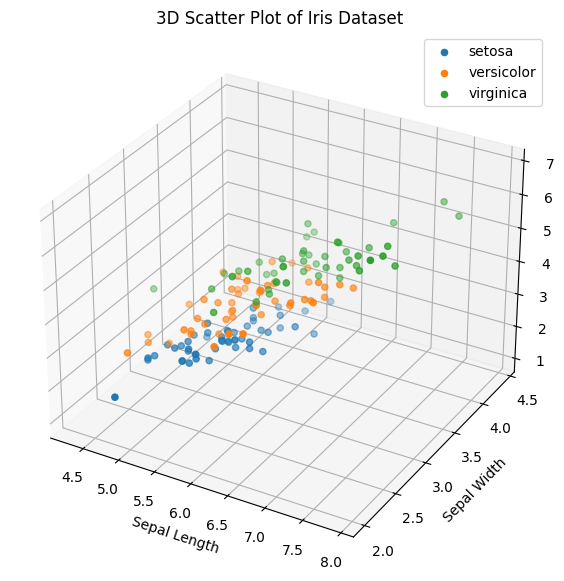

In [84]:
# 3D Scatter Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plotting data points
for species in iris_data['species'].unique():
    subset = iris_data[iris_data['species'] == species]
    ax.scatter(subset['sepal_length'], subset['sepal_width'], subset['petal_length'], label=species)

# Setting labels and title
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')
ax.set_title('3D Scatter Plot of Iris Dataset')
ax.legend()

plt.show()

In [96]:
import plotly.graph_objects as px
plot = px.Figure(data=[px.Scatter(
	x=iris_data['petal_length'],
	y=iris_data['petal_width'],
	mode='markers',)
])

# Add dropdown
plot.update_layout(
	updatemenus=[
		dict(
			type="buttons",
			direction="left",
			buttons=list([
				dict(
					args=["type", "scatter"],
					label="Scatter Plot",
					method="restyle"
				),
				dict(
					args=["type", "bar"],
					label="Bar Plot",
					method="restyle"
				)]),),])
plot.update_xaxes(title_text="Petal Length")
plot.update_yaxes(title_text="Petal Width")
plot.update_layout(title_text="Iris Petal Length vs Width",title_x=0.6)
plot.show()